In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150

train = pd.read_csv('../data/household/train.csv')
test = pd.read_csv('../data/household/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

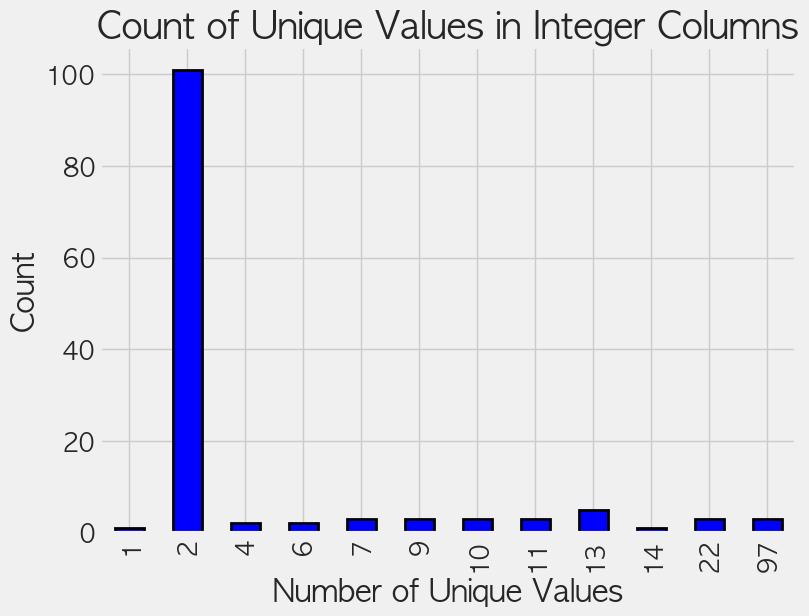

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue',
                                                                             figsize=(8, 6),
                                                                             edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

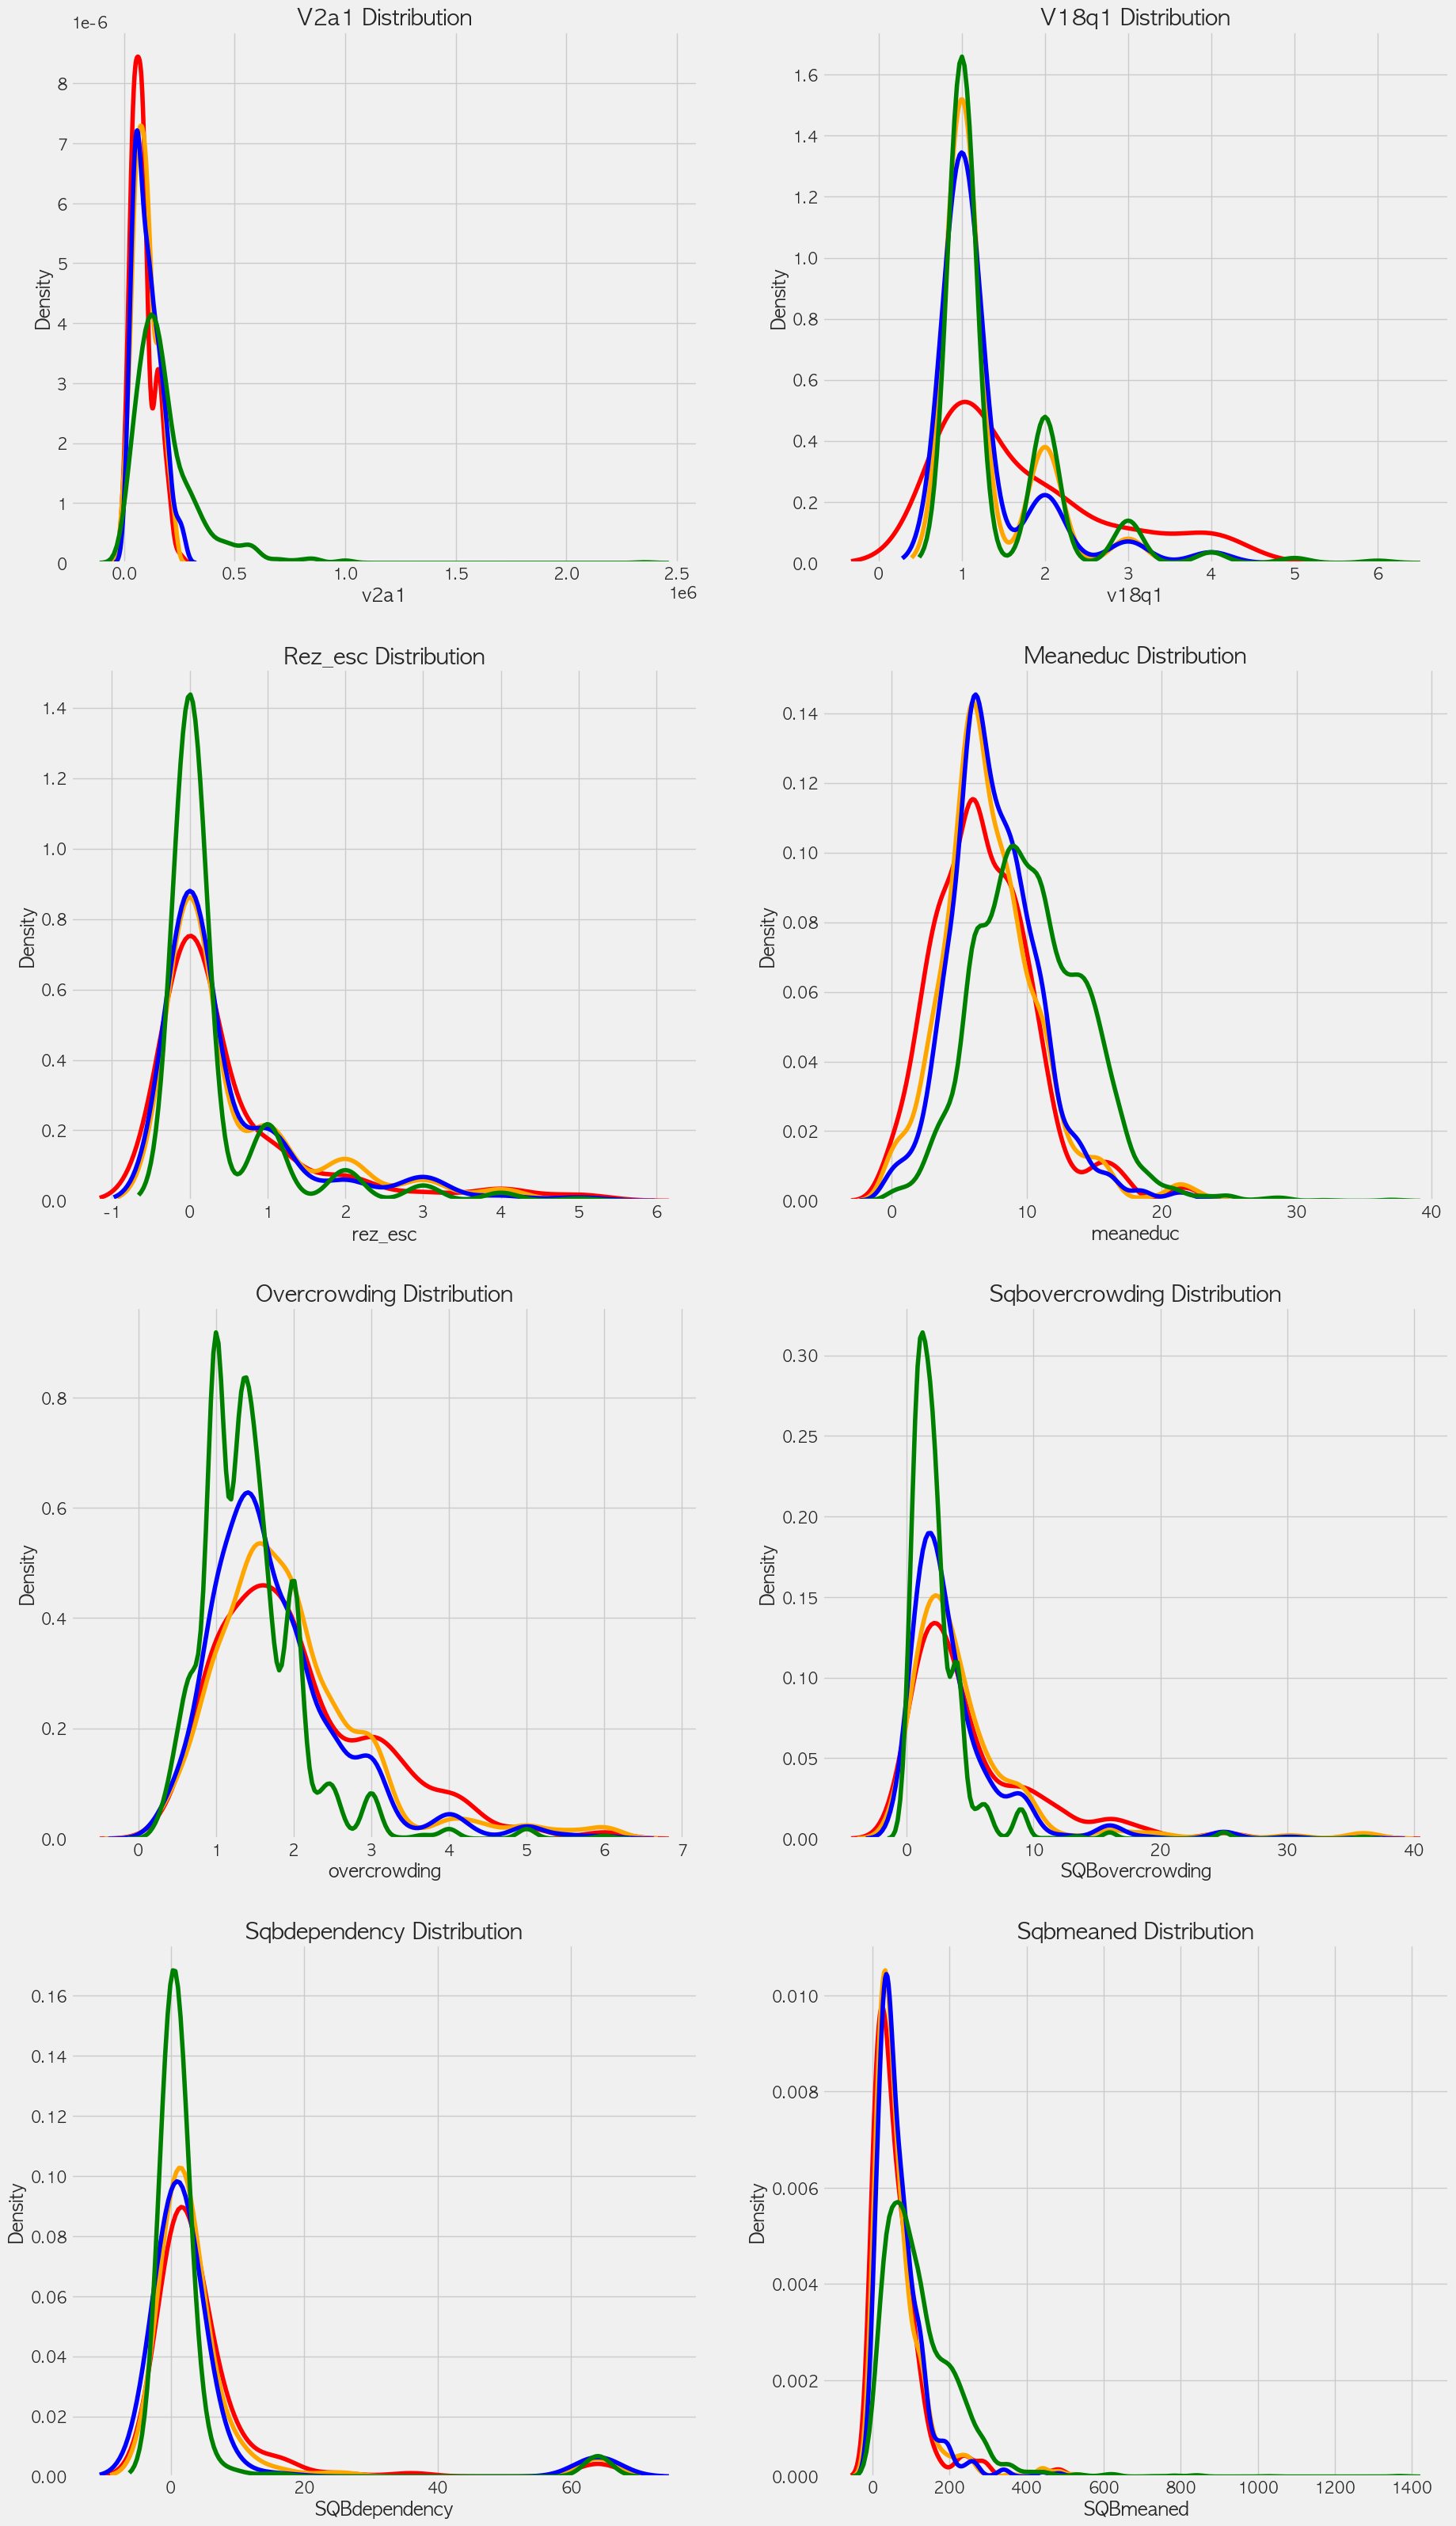

In [6]:
from collections import OrderedDict

plt.figure(figsize=(20, 16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])

    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

In [7]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [8]:
mapping = {"yes": 1, "no": 0}

for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

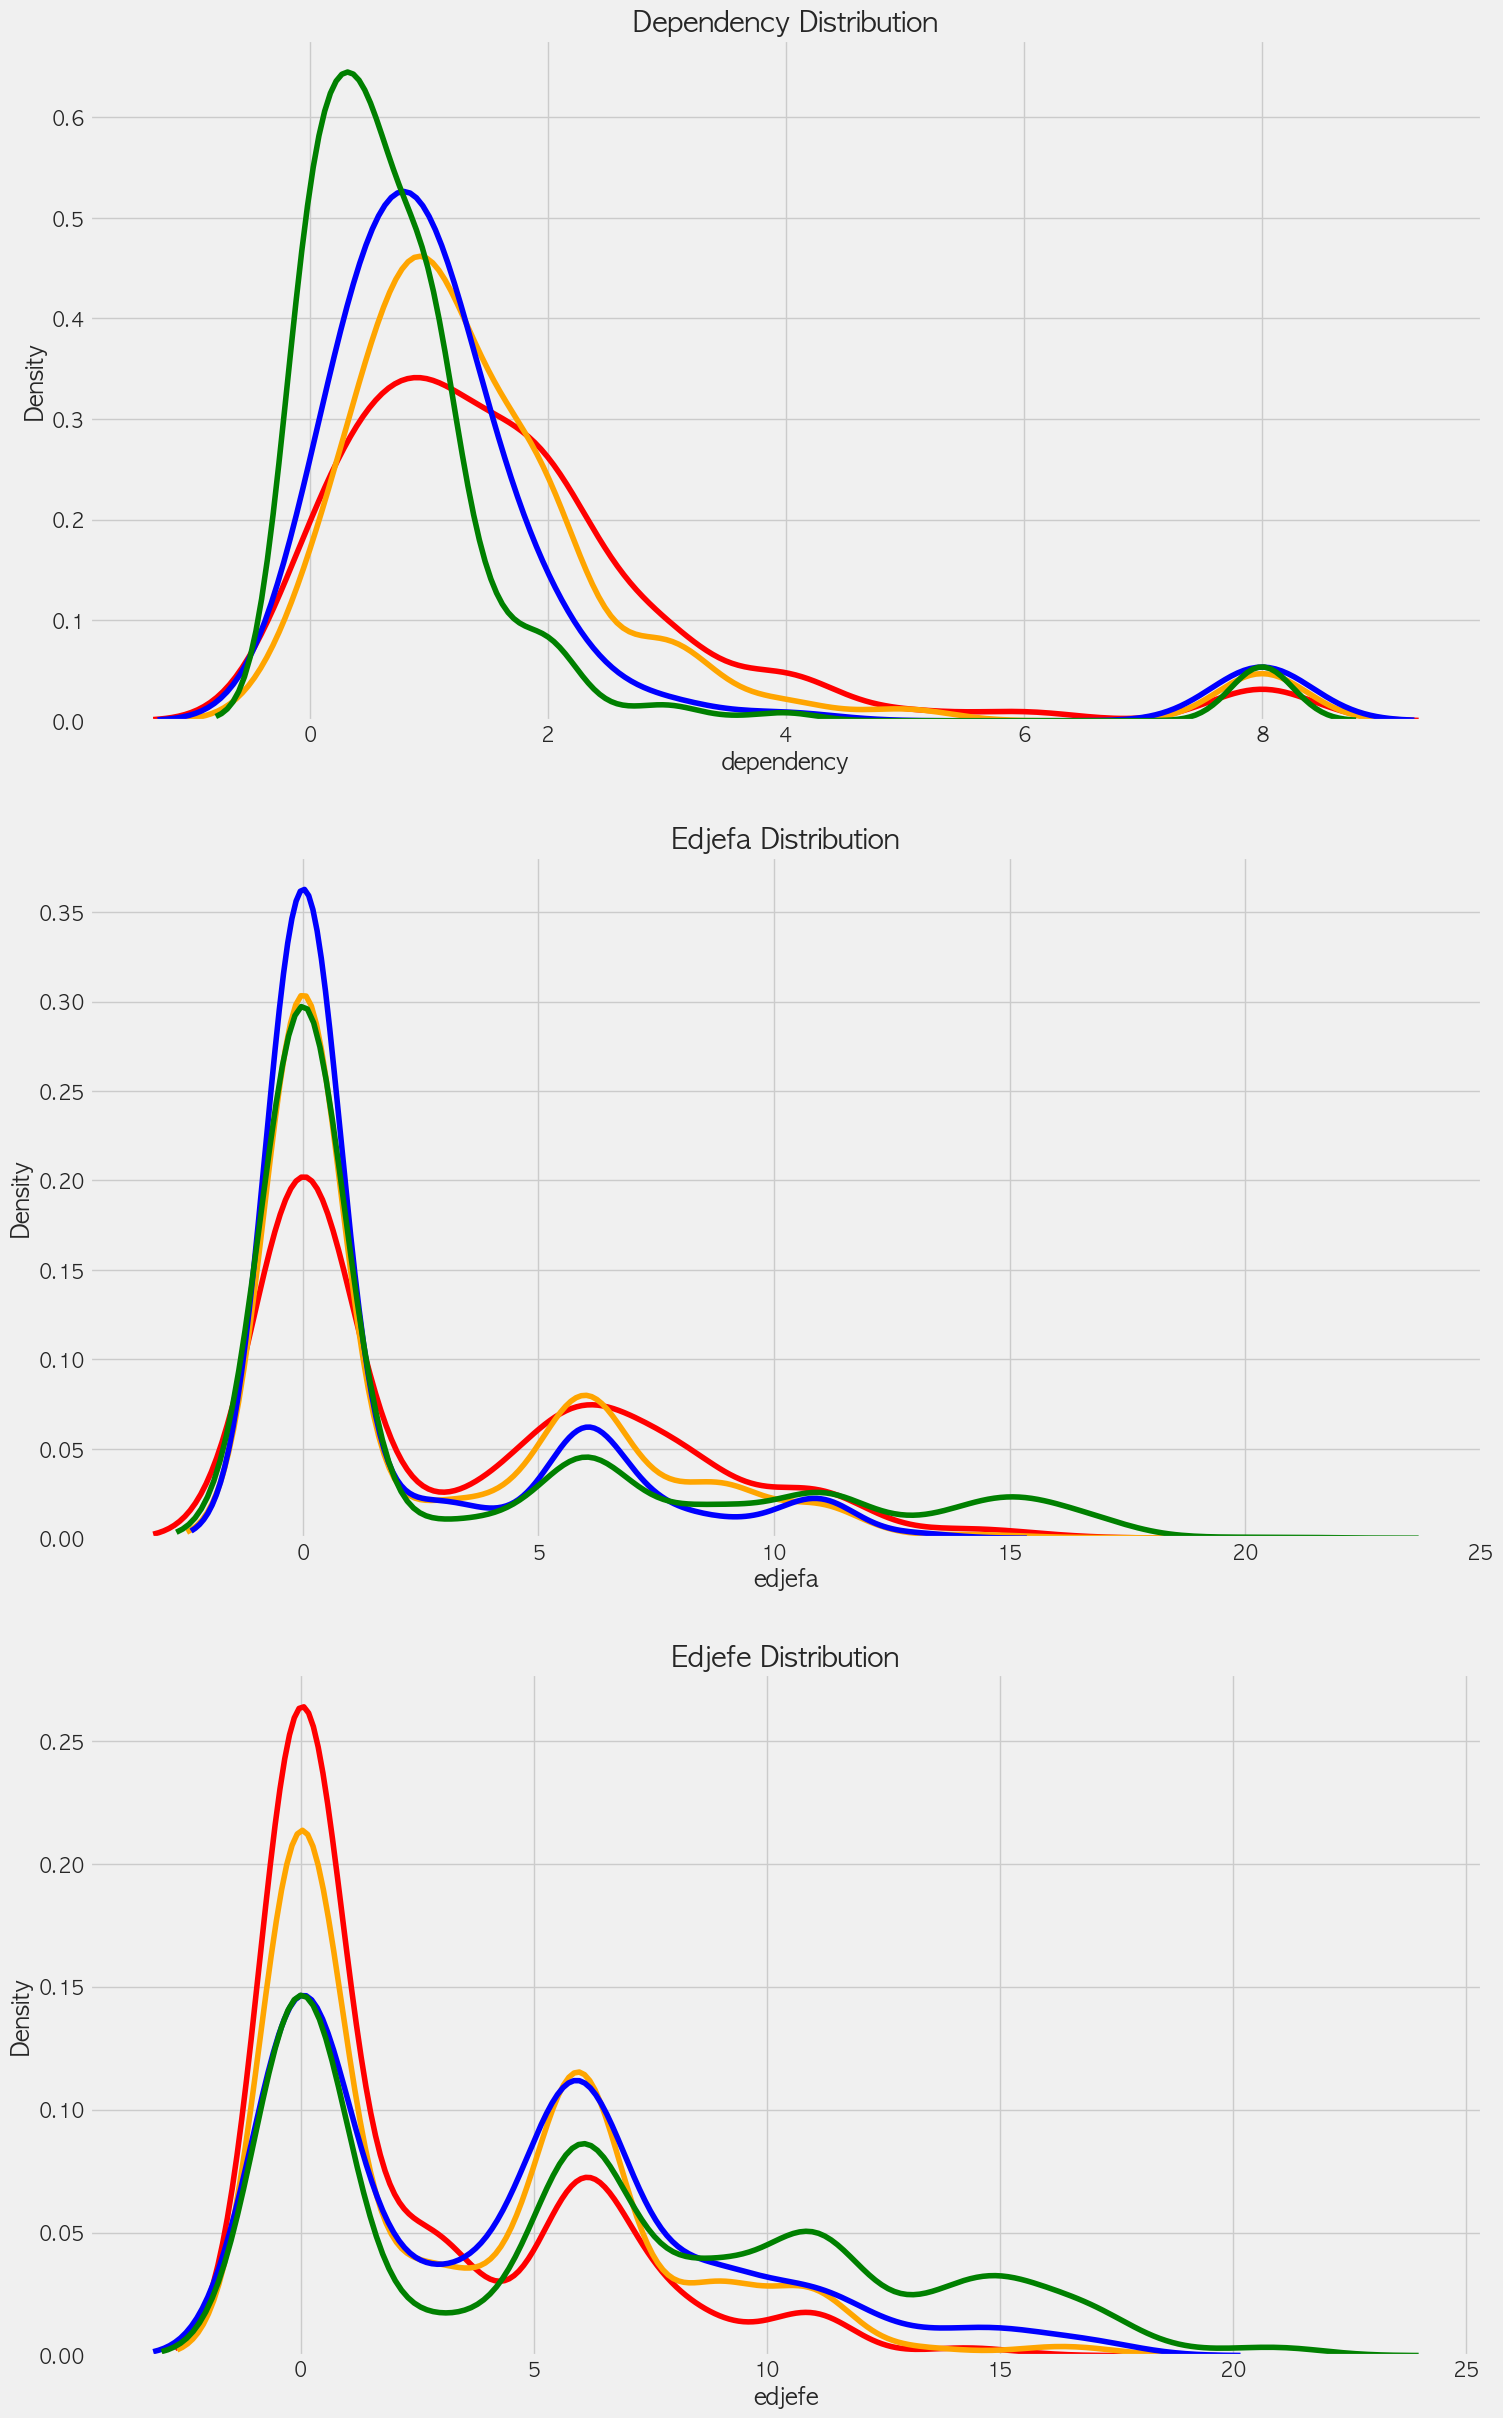

In [9]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])

    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

In [10]:
test['Target'] = np.nan
data = train.append(test, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [11]:
heads = data.loc[data['parentesco1'] == 1].copy()
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts.plot.bar(figsize=(8, 6),
                      color=colors.values(),
                      edgecolor='k', linewidth=2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x - 1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation=60)
plt.title('Poverty Level Breakdown')

label_counts

NameError: name 'data' is not defined

In [12]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [13]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [14]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [15]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


In [16]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    train.loc[train['idhogar'] == household, 'Target'] = true_target

all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_32796/205938516.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_32796/205938516.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_32796/205938516.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
/var/folders/3g/9z2y6vy916ncn7tzc7

In [17]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'total'})
missing['percent'] = missing['total'] / len(data)
missing.sort_values('percent', ascending=False).head(10).drop('Target')

NameError: name 'data' is not defined

In [18]:
def plot_value_counts(df, col, heads_only=False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()

    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot.bar(color='blue',
                                                 edgecolor='k',
                                                 linewidth=2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

In [19]:
plot_value_counts(heads, 'v18q1')

NameError: name 'heads' is not defined

In [20]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

NameError: name 'heads' is not defined

In [21]:
data['v18q1'] = data['v18q1'].fillna(0)

NameError: name 'data' is not defined

In [22]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize=(10, 8),
                                                              color='green',
                                                              edgecolor='k', linewidth=2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
           rotation=60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size=18)

NameError: name 'data' is not defined

In [23]:
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0
data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

NameError: name 'data' is not defined

In [24]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

NameError: name 'data' is not defined

In [25]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

NameError: name 'data' is not defined

In [26]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0
data['rez_esc-missing'] = data['rez_esc'].isnull()

NameError: name 'data' is not defined

In [27]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

NameError: name 'data' is not defined

In [28]:
def plot_categoricals(x, y, data, annotate=True):
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={x: 'raw_count'})
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))
    counts = counts.rename(columns={x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    counts['raw_count'] = list(raw_counts['raw_count'])

    plt.figure(figsize=(14, 10))
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
                s=100 * np.sqrt(counts['raw_count']), marker='o',
                alpha=0.6, linewidth=1.5)

    if annotate:
        for i, row in counts.iterrows():
            plt.annotate(xy=(row[x] - (1 / counts[x].nunique()),
                             row[y] - (0.15 / counts[y].nunique())),
                         color='navy',
                         s=f"{round(row['percent'], 1)}%")

    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())

    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))

    msizes = list(range(sqr_min, sqr_max, int((sqr_max - sqr_min) / 5)))
    markers = []

    for size in msizes:
        markers.append(plt.scatter([], [], s=100 * size,
                                   label=f'{int(round(np.square(size) / 100) * 100)}',
                                   color='lightgreen',
                                   alpha=0.6, edgecolor='k', linewidth=1.5))

    plt.legend(handles=markers, title='Counts',
               labelspacing=3, handletextpad=2,
               fontsize=16,
               loc=(1.10, 0.19))

    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy=(0, 1), xycoords='figure points', size=10)

    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

In [29]:
plot_categoricals('rez_esc', 'Target', data)

NameError: name 'data' is not defined

In [30]:
plot_categoricals('escolari', 'Target', data, annotate=False)

NameError: name 'data' is not defined

In [31]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

NameError: name 'data' is not defined

In [32]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

NameError: name 'data' is not defined

In [33]:
id_ = ['Id', 'idhogar', 'Target']

In [34]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3',
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7',
            'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5',
            'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10',
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3',
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo',
           'paredpreb', 'pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother',
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo',
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
           'public', 'planpri', 'noelec', 'coopele', 'sanitario1',
           'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4',
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4',
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3',
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2',
              'r4t3', 'v18q1', 'tamhog', 'tamviv', 'hhsize', 'hogar_nin',
              'hogar_adul', 'hogar_mayor', 'hogar_total', 'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [35]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True


NameError: name 'data' is not defined

In [36]:
sns.lmplot('age', 'SQBage', data=data, fit_reg=False)
plt.title('Squared Age versus Age')

NameError: name 'data' is not defined

In [37]:
data = data.drop(columns=sqr_)
data.shape

NameError: name 'data' is not defined

In [38]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

NameError: name 'data' is not defined

In [39]:
corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

NameError: name 'heads' is not defined

In [40]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

NameError: name 'corr_matrix' is not defined

In [41]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap=plt.cm.autumn_r, fmt='.3f')

NameError: name 'corr_matrix' is not defined

In [42]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])

NameError: name 'heads' is not defined

In [43]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size=8)
plt.title('Household size vs number of persons living in the household')

NameError: name 'data' is not defined

In [44]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

NameError: name 'heads' is not defined

In [45]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

NameError: name 'corr_matrix' is not defined

In [46]:
elec = []

for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

NameError: name 'heads' is not defined

In [47]:
plot_categoricals('elec', 'Target', heads)

NameError: name 'heads' is not defined

In [48]:
heads = heads.drop(columns='area2')
heads.groupby('area1')['Target'].value_counts(normalize=True)

NameError: name 'heads' is not defined

In [49]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis=1)
plot_categoricals('walls', 'Target', heads)

NameError: name 'heads' is not defined

In [50]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis=1)
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)

NameError: name 'heads' is not defined

In [51]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

NameError: name 'heads' is not defined

In [52]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(
    columns={'Target': 'Normalized Count'}).reset_index()
counts.head()

NameError: name 'heads' is not defined

In [53]:
heads['warning'] = 1 * (heads['sanitario1'] +
                        (heads['elec'] == 0) +
                        heads['pisonotiene'] +
                        heads['abastaguano'] +
                        (heads['cielorazo'] == 0))

NameError: name 'heads' is not defined

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('Target vs Warning Variable')

NameError: name 'heads' is not defined

<Figure size 1000x600 with 0 Axes>

In [55]:
plot_categoricals('warning', 'Target', data=heads)

NameError: name 'heads' is not defined

In [56]:
heads['bonus'] = 1 * (heads['refrig'] +
                      heads['computer'] +
                      (heads['v18q1'] > 0) +
                      heads['television'])

sns.violinplot('bonus', 'Target', data=heads, figsize=(10, 6))
plt.title('Target vs Bonus Variable')

NameError: name 'heads' is not defined

In [57]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

NameError: name 'heads' is not defined

In [58]:
from scipy.stats import spearmanr


def plot_corrs(x, y):
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]

    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure(figsize=(6, 4))
    sns.regplot('x', 'y', data=data, fit_reg=False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}')

In [59]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

TypeError: regplot() got multiple values for argument 'data'

<Figure size 600x400 with 0 Axes>

In [60]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

TypeError: regplot() got multiple values for argument 'data'

<Figure size 600x400 with 0 Axes>

In [61]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

TypeError: regplot() got multiple values for argument 'data'

<Figure size 600x400 with 0 Axes>

In [62]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns={'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

NameError: name 'heads' is not defined

In [63]:
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

feats = []
scorr = []
pvalues = []

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c)
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

NameError: name 'heads' is not defined

In [64]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:


NameError: name 'scorrs' is not defined

In [65]:
corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

NameError: name 'pcorrs' is not defined

In [66]:
corrs.sort_values('diff').dropna().tail()

NameError: name 'corrs' is not defined

In [67]:
sns.lmplot('dependency', 'Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Dependency')

NameError: name 'train_heads' is not defined

In [68]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita')

NameError: name 'train_heads' is not defined

In [69]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

corr_mat = train_heads[variables].corr().round(2)
plt.rcParams['font.size'] = 18
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8, center=0,
            cmap=plt.cm.RdYlGn_r, annot=True)

NameError: name 'train_heads' is not defined

In [70]:
import warnings

warnings.filterwarnings('ignore')

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data=plot_data, size=4, diag_sharey=False,
                    hue='Target', hue_order=[4, 3, 2, 1],
                    vars=[x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter, alpha=0.8, s=20)
grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size=32, y=1.05)

NameError: name 'train_heads' is not defined

In [71]:
household_feats = list(heads.columns)

NameError: name 'heads' is not defined

In [72]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

NameError: name 'data' is not defined

In [73]:
corr_matrix = ind.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

NameError: name 'ind' is not defined

In [74]:
ind = ind.drop(columns='male')

NameError: name 'ind' is not defined

In [75]:
ind[[c for c in ind if c.startswith('instl')]].head()

NameError: name 'ind' is not defined

In [76]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis=1)
plot_categoricals('inst', 'Target', ind, annotate=False)

NameError: name 'ind' is not defined

In [77]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Target', y='inst', data=ind)
plt.title('Education Distribution by Target')

NameError: name 'ind' is not defined

<Figure size 1000x800 with 0 Axes>

In [78]:
ind.shape

NameError: name 'ind' is not defined

In [79]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize=(10, 8))
sns.violinplot('Target', 'escolari/age', data=ind)

NameError: name 'ind' is not defined

In [80]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

NameError: name 'ind' is not defined

In [81]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

NameError: name 'ind' is not defined

In [82]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

NameError: name 'ind' is not defined

In [83]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

NameError: name 'ind_agg' is not defined

In [84]:
corr_matrix = ind_agg.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

NameError: name 'ind_agg' is not defined

In [85]:
ind_agg = ind_agg.drop(columns=to_drop)
ind_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on='idhogar', how='left')

print('Final features shape: ', final.shape)

NameError: name 'ind_agg' is not defined

In [86]:
final.head()

NameError: name 'final' is not defined

In [87]:
corrs = final.corr()['Target']

NameError: name 'final' is not defined

In [88]:
corrs.sort_values().head()

NameError: name 'corrs' is not defined

In [89]:
corrs.sort_values().dropna().tail()

NameError: name 'corrs' is not defined

In [90]:
plot_categoricals('escolari-max', 'Target', final, annotate=False)

NameError: name 'final' is not defined

In [91]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='escolari-max', data=final)
plt.title('Max Schooling by Target')

NameError: name 'final' is not defined

<Figure size 1000x600 with 0 Axes>

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='escolari-max', data=final)
plt.title('Max Schooling by Target')

NameError: name 'final' is not defined

<Figure size 1000x600 with 0 Axes>

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='meaneduc', data=final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target')

NameError: name 'final' is not defined

<Figure size 1000x600 with 0 Axes>

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='overcrowding', data=final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target')

NameError: name 'final' is not defined

<Figure size 1000x600 with 0 Axes>

In [95]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on='idhogar', how='left').rename(columns={'female': 'female-head'})

NameError: name 'ind' is not defined

In [96]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

NameError: name 'final' is not defined

In [97]:
sns.violinplot(x='female-head', y='Target', data=final)
plt.title('Target by Female Head of Household')

NameError: name 'final' is not defined

In [98]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Target', y='meaneduc', hue='female-head', data=final)
plt.title('Average Education by Target and Female Head of Household', size=16)

NameError: name 'final' is not defined

<Figure size 800x800 with 0 Axes>

In [99]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

NameError: name 'final' is not defined

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better=True, average='macro')

In [102]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

train_set = final[final['Target'].notnull()].drop(columns=['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns=['Id', 'idhogar', 'Target'])

submission_base = test[['Id', 'idhogar']].copy()

NameError: name 'final' is not defined

In [103]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

NameError: name 'train_set' is not defined

In [104]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)
cv_score = cross_val_score(model, train_set, train_labels, cv=10, scoring=scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

NameError: name 'train_set' is not defined

In [105]:
model.fit(train_set, train_labels)

feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

NameError: name 'train_set' is not defined

In [106]:
def plot_feature_importances(df, n=10, threshold=None):
    plt.style.use('fivethirtyeight')

    df = df.sort_values('importance', ascending=False).reset_index(drop=True)
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    plt.rcParams['font.size'] = 12

    df.loc[:n, :].plot.barh(y='importance_normalized',
                            x='feature', color='darkgreen',
                            edgecolor='k', figsize=(12, 8),
                            legend=False, linewidth=2)

    plt.xlabel('Normalized Importance', size=18)
    plt.ylabel('')
    plt.title(f'{n} Most Important Features', size=18)
    plt.gca().invert_yaxis()

    if threshold:
        plt.figure(figsize=(8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size=16)
        plt.ylabel('Cumulative Importance', size=16)
        plt.title('Cumulative Feature Importance', size=18)

        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))

        plt.vlines(importance_index + 1, ymin=0, ymax=1.05, linestyles='--', colors='red')
        plt.show()

        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1,
                                                                                  100 * threshold))

    return df

In [107]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

NameError: name 'feature_importances' is not defined

In [108]:
def kde_target(df, variable):
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize=(12, 8))

    df = df[df['Target'].notnull()]

    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(),
                    label=f'Poverty Level: {level}',
                    color=colors[int(subset['Target'].unique())])

    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('{} Distribution'.format(variable.capitalize()))

In [109]:
kde_target(final, 'meaneduc')

NameError: name 'final' is not defined

In [110]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

model_results = pd.DataFrame(columns=['model', 'cv_mean', 'cv_std'])


def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv=10, scoring=scorer, n_jobs=-1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name,
                                                           'cv_mean': cv_scores.mean(),
                                                           'cv_std': cv_scores.std()},
                                                          index=[0]),
                                             ignore_index=True)

        return model_results

In [111]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)

NameError: name 'train_set' is not defined

In [112]:
model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)

NameError: name 'train_set' is not defined

In [113]:
model_results = cv_model(train_set, train_labels,
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

NameError: name 'train_set' is not defined

In [114]:
model_results = cv_model(train_set, train_labels,
                         LinearDiscriminantAnalysis(),
                         'LDA', model_results)

NameError: name 'train_set' is not defined

In [115]:
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)

NameError: name 'train_set' is not defined

In [116]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels,
                             KNeighborsClassifier(n_neighbors=n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors



NameError: name 'train_set' is not defined

In [117]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels,
                         ExtraTreesClassifier(n_estimators=100, random_state=10),
                         'EXT', model_results)

NameError: name 'train_set' is not defined

In [118]:
model_results = cv_model(train_set, train_labels,
                         RandomForestClassifier(100, random_state=10),
                         'RF', model_results)

NameError: name 'train_set' is not defined

In [119]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

TypeError: no numeric data to plot

In [120]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

NameError: name 'final' is not defined

In [121]:
def submit(model, train, train_labels, test, test_ids):
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                                'Target': predictions})

    submission = submission_base.merge(predictions,
                                       on='idhogar',
                                       how='left').drop(columns=['idhogar'])

    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission

In [122]:
rf_submission = submit(RandomForestClassifier(n_estimators=100,
                                              random_state=10, n_jobs=-1),
                       train_set, train_labels, test_set, test_ids)

rf_submission.to_csv('rf_submission.csv', index=False)

NameError: name 'train_set' is not defined

In [123]:
train_set = pd.DataFrame(train_set, columns=features)

corr_matrix = train_set.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

NameError: name 'train_set' is not defined

In [124]:
train_set = train_set.drop(columns=to_drop)
train_set.shape

NameError: name 'train_set' is not defined

In [125]:
test_set = pd.DataFrame(test_set, columns=features)
train_set, test_set = train_set.align(test_set, axis=1, join='inner')
features = list(train_set.columns)

NameError: name 'test_set' is not defined

In [126]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state=10, n_estimators=100, n_jobs=-1)
selector = RFECV(estimator, step=1, cv=3, scoring=scorer, n_jobs=-1)

In [127]:
selector.fit(train_set, train_labels)

NameError: name 'train_set' is not defined

In [129]:
plt.plot(selector.grid_scores_)

plt.xlabel('Number of Features')
plt.ylabel('Macro F1 Score')
plt.title('Feature Selection Scores')
selector.n_features_

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

In [130]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

NameError: name 'train_set' is not defined

In [131]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

NameError: name 'train_set' is not defined

In [132]:
selected_features = train_set.columns[np.where(selector.ranking_ == 1)]
train_selected = pd.DataFrame(train_selected, columns=selected_features)
test_selected = pd.DataFrame(test_selected, columns=selected_features)

NameError: name 'train_set' is not defined

In [133]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

NameError: name 'train_selected' is not defined

In [134]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

KeyError: "None of ['model'] are in the columns"

In [135]:
def macro_f1_score(labels, predictions):
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis=0)

    metric_value = f1_score(labels, predictions, average='macro')

    return 'macro_f1', metric_value, True

In [136]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display


def model_gbm(features, labels, test_features, test_ids, nfolds=5, return_preds=False, hyp=None):
    feature_names = list(features.columns)

    if hyp is not None:
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp

    else:
        params = {'boosting_type': 'dart',
                  'colsample_bytree': 0.88,
                  'learning_rate': 0.028,
                  'min_child_samples': 10,
                  'num_leaves': 36, 'reg_alpha': 0.76,
                  'reg_lambda': 0.43,
                  'subsample_for_bin': 40000,
                  'subsample': 0.54,
                  'class_weight': 'balanced'}

    model = lgb.LGBMClassifier(**params, objective='multiclass',
                               n_jobs=-1, n_estimators=10000,
                               random_state=10)

    strkfold = StratifiedKFold(n_splits=nfolds, shuffle=True)

    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))

    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1))

    valid_scores = []

    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        fold_predictions = pd.DataFrame()

        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]

        model.fit(X_train, y_train, early_stopping_rounds=100,
                  eval_metric=macro_f1_score,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  eval_names=['train', 'valid'],
                  verbose=200)

        valid_scores.append(model.best_score_['valid']['macro_f1'])

        fold_probabilitites = model.predict_proba(test_features)

        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]

        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i + 1)

        predictions = predictions.append(fold_predictions)

        importances += model.feature_importances_ / nfolds

        display(
            f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

    valid_scores = np.array(valid_scores)
    display(
        f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')

    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
        return predictions, feature_importances

    predictions = predictions.groupby('idhogar', as_index=False).mean()
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
    predictions = predictions.drop(columns=['fold'])

    submission = submission_base.merge(predictions[['idhogar', 'Target']], on='idhogar', how='left').drop(
        columns=['idhogar'])

    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    return submission, feature_importances, valid_scores

In [137]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

NameError: name 'train_set' is not defined

In [138]:
predictions.head()

NameError: name 'predictions' is not defined

In [139]:
plt.rcParams['font.size'] = 18

g = sns.FacetGrid(predictions, row='fold', hue='Target', size=3, aspect=4)
g.map(sns.kdeplot, 'confidence')
g.add_legend()

plt.suptitle('Distribution of Confidence by Fold and Target', y=1.05)

NameError: name 'predictions' is not defined

In [140]:
plt.figure(figsize=(24, 12))
sns.violinplot(x='Target', y='confidence', hue='fold', data=predictions)

NameError: name 'predictions' is not defined

<Figure size 2400x1200 with 0 Axes>

In [141]:
predictions = predictions.groupby('idhogar', as_index=False).mean()

predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
predictions = predictions.drop(columns=['fold'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='confidence', data=predictions)
plt.title('Confidence by Target')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='confidence', data=predictions)
plt.title('Confidence by Target');

NameError: name 'predictions' is not defined

In [142]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels,
                                             test_set, test_ids, return_preds=False)

submission.to_csv('gbm_baseline.csv')

NameError: name 'train_set' is not defined

In [143]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

NameError: name 'gbm_fi' is not defined

In [144]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels,
                                                               test_selected, test_ids)

NameError: name 'train_selected' is not defined

In [145]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"],
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std': [valid_scores.std(), valid_scores_selected.std()]}),
                                     sort=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [146]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

KeyError: "None of ['model'] are in the columns"

In [147]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids,
                                             nfolds=10, return_preds=False)

NameError: name 'train_set' is not defined

In [148]:
submission.to_csv('gbm_10fold.csv', index=False)

NameError: name 'submission' is not defined

In [149]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids,
                                                               nfolds=10)

NameError: name 'train_selected' is not defined

In [150]:
submission.to_csv('gmb_10fold_selected.csv', index=False)

NameError: name 'submission' is not defined

In [151]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"],
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std': [valid_scores.std(), valid_scores_selected.std()]}),
                                     sort=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [152]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                  edgecolor='k', linewidth=2,
                                  yerr=list(model_results['cv_std']))
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

KeyError: "None of ['model'] are in the columns"

In [153]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")

NameError: name 'gbm_fi_selected' is not defined

In [155]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample
import csv
import ast
from timeit import default_timer as timer


def objective(hyperparameters, nfolds=5):
    global ITERATION
    ITERATION += 1

    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)

    boosting_type = hyperparameters['boosting_type']['boosting_type']

    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']

    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type

    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1

    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin',
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']

    strkfold = StratifiedKFold(n_splits=nfolds, shuffle=True)
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1))

    valid_scores = []
    best_estimators = []
    run_times = []

    model = lgb.LGBMClassifier(**hyperparameters, class_weight='balanced',
                               n_jobs=-1, metric='None',
                               n_estimators=10000)

    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]

        start = timer()
        model.fit(X_train, y_train, early_stopping_rounds=100,
                  eval_metric=macro_f1_score,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  eval_names=['train', 'valid'],
                  verbose=400)
        end = timer()
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)

        run_times.append(end - start)

    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score

    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)

    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators

    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()

    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')

    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK,
            'score': score, 'score_std': score_std}

In [156]:
space = {
    'boosting_type': hp.choice('boosting_type',
                               [{'boosting_type': 'gbdt',
                                 'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)},
                                {'boosting_type': 'dart',
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate',
                                   np.log(0.025),
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [157]:
sample(space)

{'boosting_type': {'boosting_type': 'dart',
  'drop_rate': 0.1602498660928031,
  'subsample': 0.8063595716526533,
  'subsample_freq': 6.0},
 'colsample_bytree': 0.7580866136488471,
 'learning_rate': 0.050373986575343366,
 'limit_max_depth': False,
 'max_depth': 16.0,
 'min_child_samples': 20.0,
 'num_leaves': 42.0,
 'reg_alpha': 0.7997416187005382,
 'reg_lambda': 0.6940603468727742,
 'subsample_for_bin': 68000.0}

In [158]:
algo = tpe.suggest

In [159]:
trials = Trials()

OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [160]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

best = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials,
            max_evals=MAX_EVALS)

'Running Optimization for 100 Trials.'

NameError: name 'train_selected' is not defined

In [161]:
import json

with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

In [162]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending=True).reset_index()
results.head()

,index,loss,hyperparameters,iteration,runtime,score,std


In [163]:
plt.figure(figsize=(8, 6))
sns.regplot('iteration', 'score', data=results)
plt.title("Optimization Scores")
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)))

TypeError: regplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [164]:
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

KeyError: 0

In [165]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels,
                                             test_selected, test_ids,
                                             nfolds=10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_SEL"],
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std': [valid_scores.std()]}),
                                     sort=True).sort_values('cv_mean', ascending=False)

NameError: name 'train_selected' is not defined

In [166]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels,
                                             test_set, test_ids,
                                             nfolds=10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold"],
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std': [valid_scores.std()]}),
                                     sort=True).sort_values('cv_mean', ascending=False)

NameError: name 'train_set' is not defined

In [167]:
model_results.head()

,cv_mean,cv_std
model,,


In [168]:
submission.to_csv('gbm_opt_10fold_selected.csv', index=False)

NameError: name 'submission' is not defined

In [169]:
_ = plot_feature_importances(gbm_fi)

NameError: name 'gbm_fi' is not defined

In [170]:
preds = submission_base.merge(submission, on='Id', how='left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
heads['Target'].sort_index().plot.hist(normed=True,
                                       edgecolor=r'k',
                                       linewidth=2,
                                       ax=axes[0])

axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(poverty_mapping.values(), rotation=60)
axes[0].set_title('Train Label Distribution')

preds['Target'].sort_index().plot.hist(normed=True,
                                       edgecolor='k',
                                       linewidth=2,
                                       ax=axes[1])
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(poverty_mapping.values(), rotation=60)
plt.subplots_adjust()
plt.title('Predicted Label Distribution')

NameError: name 'submission_base' is not defined

In [171]:
heads['Target'].value_counts()

NameError: name 'heads' is not defined

In [172]:
preds['Target'].value_counts()

NameError: name 'preds' is not defined

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_selected,
                                                      train_labels,
                                                      test_size=1000,
                                                      random_state=10)

model = lgb.LGBMClassifier(**best_hyp,
                           class_weight='balanced',
                           random_state=10)
model.fit(X_train, y_train)

NameError: name 'train_selected' is not defined

In [174]:
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns=[1, 2, 3, 4])

preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis=1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis=1)

preds_df.head()

NameError: name 'X_valid' is not defined

In [175]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average='macro'), 5))

NameError: name 'y_valid' is not defined

In [176]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

In [177]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title='Poverty Confusion Matrix')

NameError: name 'y_valid' is not defined

In [178]:
plot_confusion_matrix(cm, normalize=True,
                      classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title='Poverty Confusion Matrix')

NameError: name 'cm' is not defined

In [180]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

ImportError: cannot import name 'UMAP' from 'umap' (/opt/anaconda3/lib/python3.11/site-packages/umap/__init__.py)

In [181]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], ['umap', 'pca', 'ica', 'tsne']):

    if name == 'tsne':
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
    else:
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()

        test_reduction = method.transform(test_selected)
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]

    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]

    print(f'Method: {name} {round(end - start, 2)} seconds elapsed.')

NameError: name 'train_selected' is not defined

In [182]:
from mpl_toolkits.mplot3d import Axes3D


def discrete_cmap(N, base_cmap=None):
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


cmap = discrete_cmap(4, base_cmap=plt.cm.RdYlBu)

train_df['label'] = train_labels

NameError: name 'train_labels' is not defined

In [183]:
for method, name in zip([umap, pca, ica, tsne],
                        ['umap', 'pca', 'ica', 'tsne']):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2' % name], train_df['%s_c3' % name],
                   c=train_df['label'].astype(int), cmap=cmap)

    plt.title(f'{name.capitalize()}', size=22)
    fig.colorbar(p, aspect=4, ticks=[1, 2, 3, 4])

NameError: name 'umap' is not defined

In [184]:
train_df, test_df = train_df.align(test_df, axis=1, join='inner')

NameError: name 'train_df' is not defined

In [185]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels,
                                             test_df, test_ids, nfolds=10,
                                             hyp=best_hyp)

NameError: name 'train_df' is not defined

In [186]:
submission.to_csv('gbm_opt_10fold_dr.csv', index=False)

NameError: name 'submission' is not defined

In [187]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_DR"],
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std': [valid_scores.std()]}),
                                     sort=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [188]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(10, 8),
                                  edgecolor='k', linewidth=2,
                                  yerr=list(model_results['cv_std']))
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

KeyError: "None of ['model'] are in the columns"

In [189]:
_ = plot_feature_importances(gbm_fi)

NameError: name 'gbm_fi' is not defined

In [190]:
model = RandomForestClassifier(max_depth=3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimators_[5]
estimator_limited

NameError: name 'train_selected' is not defined

In [191]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names=train_selected.columns,
                class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'],
                rounded=True, proportion=False, precision=2, filled=True)

NameError: name 'estimator_limited' is not defined

In [192]:
from IPython.display import Image

Image(filename='tree_limited.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree_limited.png'

In [193]:
model = RandomForestClassifier(max_depth=None, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_nonlimited = model.estimators_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names=train_selected.columns,
                class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'],
                rounded=True, proportion=False, precision=2)

!dot -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

NameError: name 'train_selected' is not defined

In [194]:
Image(filename = 'tree_nonlimited.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree_nonlimited.png'